In [150]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

# Q1(a)

In [335]:
from sklearn import datasets
iris = datasets.load_iris()
index = np.argwhere(iris['target']==2).reshape((1,50))

In [336]:
def normpdf(x, mean, sd):
    var = float(sd)**2
    denom = (2*math.pi*var)**.5
    num = math.exp(-(float(x)-float(mean))**2/(2*var))
    return num/denom

def naive_bayes(data,target):
    model = dict()
    target_values = np.unique(target)
    #r,c = data.shape
    for i in range (0,len(target_values)):
        indices = np.argwhere(target==target_values[i]).reshape((1,-1))
        mini_data = data[indices,:][0]
        _,c = mini_data.shape
        
        for j in range(0,c):
            feature_samples = mini_data[:,j]
            mean = np.mean(feature_samples)
            std = np.std(feature_samples)
            model[str(j+1)+str(i+1)] = (mean,std)
        model[str(i+1)] = len(indices)/len(target)
    
    return model

def predict(test_data,target_names,model):
    r,c = test_data.shape
    answer = np.zeros((1,r))
    
    for i in range (0,r):
        probabilities=[]
        for j in range(0,len(target_names)):
            product = 1
            for k in range(0,c):
                mean,std = model[str(k+1)+str(j+1)]
                product = product*normpdf(test_data[i,k],mean,std)
            product = product*model[str(j+1)]
            probabilities.append(product)
        answer[0,i] = int(probabilities.index(max(probabilities)))
            
    return answer       
        

In [337]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
train_X,test_X,train_Y,test_Y = train_test_split(iris['data'][:,[0,3]],iris['target'],test_size=0.3,random_state = 42)
target_names = np.unique(train_Y)
model = naive_bayes(train_X,train_Y)
predictions = predict(test_X,target_names,model)
mean_squared_error(test_Y.reshape((1,45)),predictions)

0.0

# Q1(b)

In [338]:
train_X,pool_X,train_Y,pool_Y = train_test_split(train_X,train_Y,test_size=0.85,random_state = 42)

In [340]:
iterations = 10

def least_confidence(test_data,target_names,model):
    r,c = test_data.shape
    answer = np.zeros((1,r))
    
    for i in range (0,r):
        probabilities=[]
        for j in range(0,len(target_names)):
            product = 1
            for k in range(0,c):
                mean,std = model[str(k+1)+str(j+1)]
                product = product*normpdf(test_data[i,k],mean,std)
            product = product*model[str(j+1)]
            probabilities.append(product)
        answer[0,i] = max(probabilities)
    return answer.argmin()        
      

for i in range (0,iterations):
    model = naive_bayes(train_X,train_Y)
    least_prob_index = least_confidence(pool_X,target_names,model)
    #print(pool_X[least_prob_index,:].shape)
    prediction =predict(pool_X[least_prob_index,:].reshape((1,-1)),target_names,model)
    train_X = np.concatenate((train_X,pool_X[least_prob_index,:].reshape((1,2))),axis=0)
    train_Y = np.concatenate((train_Y.reshape((1,-1)),prediction),axis=1)
    pool_X = np.delete(pool_X,least_prob_index,0)
    test_predictions = predict(test_X,target_names,model)
    test_Y = test_Y.reshape((-1,1))
    test_predictions = test_predictions.reshape((-1,1))
    print(accuracy_score(test_Y,test_predictions)*100)

82.2222222222
82.2222222222
82.2222222222
84.4444444444
84.4444444444
84.4444444444
84.4444444444
84.4444444444
84.4444444444
84.4444444444


In [341]:
iterations = 45 
train_X,test_X,train_Y,test_Y = train_test_split(iris['data'][:,[0,3]],iris['target'],test_size=0.35,random_state = 91)
train_X,pool_X,train_Y,pool_Y = train_test_split(train_X,train_Y,test_size=0.8,random_state = 69)
pool_X.shape

(78, 2)

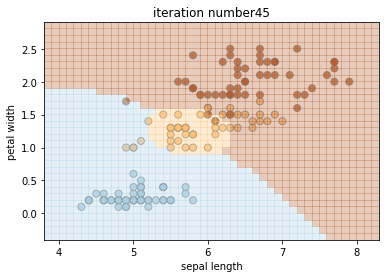

In [342]:
x_min, x_max = iris['data'][:,0].min() - .5, iris['data'][:,0].max() + .5
y_min ,y_max = iris['data'][:,3].min() - .5, iris['data'][:,3].max() + .5
h = 0.1
x1,x2= np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

for i in range (0,iterations):
    plt.gcf().clear()
    model = naive_bayes(train_X,train_Y)
    least_prob_index = least_confidence(pool_X,target_names,model)
    prediction =predict(pool_X[least_prob_index,:].reshape((1,-1)),target_names,model)
    train_X = np.concatenate((train_X,pool_X[least_prob_index,:].reshape((1,2))),axis=0)
    train_Y = np.concatenate((train_Y.reshape((1,-1)),prediction),axis=1)
    pool_X = np.delete(pool_X,least_prob_index,0)
    test_predictions = predict(test_X,target_names,model)
    test_Y = test_Y.reshape((-1,1))
    pool_predictions = predict(pool_X,target_names,model)
    Z = predict(np.c_[x1.ravel(), x2.ravel()],target_names,model)
    Z = Z.reshape(x1.shape)
    #Y = np.concatenate(train_Y.reshape((-1,1)),pool_predictions.reshape((-1,1)),axis=0)
    #Y = np.concatenate(Y,test_predictions.reshape((-1,1)),axis=0)
    #X = np.concatenate(train_X,pool_X,axis=0)
    #X = np.concatenate(X,test_X,axis=0)
    plt.scatter(iris['data'][:,0], iris['data'][:,3], c= iris['target'], alpha=0.7, cmap=plt.cm.Paired, edgecolors='grey', s=50 )
    #plt.scatter(dataset_train['x'], dataset_train['y'], c= dataset_train['class'], 
            #edgecolors='k', s=300, cmap=plt.cm.Paired )
    plt.pcolormesh(x1, x2, Z, cmap=plt.cm.Paired, alpha=0.3)
    plt.xlabel('sepal length')
    plt.ylabel('petal width')
    plt.title('iteration number' + str(i+1))
    filename=str(format(i+1, '03d'))+'.png'
    plt.savefig(filename, dpi=96)
    plt.gca()
! convert -delay 100 *.png gif.gif
from IPython.display import Image
Image(url='gif.gif')

In [294]:
iterations = 20
train_X,test_X,train_Y,test_Y = train_test_split(iris['data'][:,[0,3]],iris['target'],test_size=0.35,random_state = 42)
train_X,pool_X,train_Y,pool_Y = train_test_split(train_X,train_Y,test_size=0.8,random_state = 42)

least_confidence_accuracies = np.zeros((1,iterations))
for i in range (0,iterations):
    model = naive_bayes(train_X,train_Y)
    least_prob_index = least_confidence(pool_X,target_names,model)
    #print(pool_X[least_prob_index,:].shape)
    prediction =predict(pool_X[least_prob_index,:].reshape((1,-1)),target_names,model)
    train_X = np.concatenate((train_X,pool_X[least_prob_index,:].reshape((1,2))),axis=0)
    train_Y = np.concatenate((train_Y.reshape((1,-1)),prediction),axis=1)
    pool_X = np.delete(pool_X,least_prob_index,0)
    test_predictions = predict(test_X,target_names,model)
    test_Y = test_Y.reshape((-1,1))
    test_predictions = test_predictions.reshape((-1,1))
    least_confidence_accuracies[0,i] = accuracy_score(test_Y,test_predictions)*100

least_confidence_accuracies[0]

array([ 98.11320755,  86.79245283,  86.79245283,  88.67924528,
        88.67924528,  88.67924528,  88.67924528,  88.67924528,
        88.67924528,  88.67924528,  88.67924528,  88.67924528,
        88.67924528,  88.67924528,  88.67924528,  88.67924528,
        88.67924528,  88.67924528,  88.67924528,  88.67924528])

In [279]:
iterations = 20
random_test_accuracies = np.zeros((5,iterations))

for p in range(0,5):
    train_X,test_X,train_Y,test_Y = train_test_split(iris['data'][:,[0,3]],iris['target'],test_size=0.35,random_state = 42)
    train_X,pool_X,train_Y,pool_Y = train_test_split(train_X,train_Y,test_size=0.8,random_state = 42)
    random.seed(p)

    for i in range (0,iterations):
        model = naive_bayes(train_X,train_Y)
        random_index = random.choice(range(len(pool_X)))
        prediction =predict(pool_X[random_index,:].reshape((1,-1)),target_names,model)
        train_X = np.concatenate((train_X,pool_X[random_index,:].reshape((1,-1))),axis=0)
        train_Y = np.concatenate((train_Y.reshape((1,-1)),prediction),axis=1)
        pool_X = np.delete(pool_X,random_index,0)
        test_predictions = predict(test_X,target_names,model)
        test_Y = test_Y.reshape((-1,1))
        test_predictions = test_predictions.reshape((-1,1))
        random_test_accuracies[p,i] = accuracy_score(test_Y,test_predictions)*100




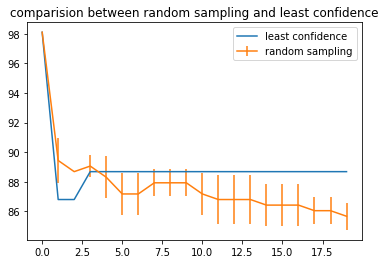

In [323]:
plt.plot(range(iterations),least_confidence_accuracies[0,:],'-')
plt.errorbar(range(iterations),np.mean(random_test_accuracies,axis=0),np.std(random_test_accuracies,axis=0))
plt.title('comparision between random sampling and least confidence')
plt.legend(["least confidence","random sampling"])
plt.show()

As seen from the graph above, the least_confidence method works smart as compared to that of the random sampling method by choosing the query through the least_confidence approach 